## Translations

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [74]:
def BGR2RGB(x):
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    return x

In [91]:
def pltimage(x):
    plt.imshow(BGR2RGB(x))
#     plt.imshow(x)
    plt.axis('off')
    plt.show()
#     print(n)
    
    

### Affine Vs Non Affine

- **Affine transformation** is a linear mapping method that preserves points, straight lines, and planes. Sets of parallel lines remain parallel after an affine transformation. Translation, **scaling, rotation, and skewing** are all classified as affine transforms. Affine transforms preserve parallel lines. If two lines are parallel prior to the transform, they **remain parallel after the transform**. Rectangles are always transformed to parallelograms.


- **Non Affine** : The non-affine or projective transformation **does not preserve parallelism**, length, and angle. It does however preserve collinearity and incidence.



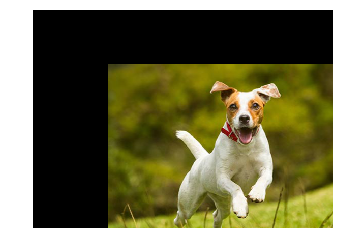

In [76]:
# We use cv2.warpAffine to implement these transformations.
image = cv2.imread('Input/Image/dog.jpg')
# image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) 
# Store height and width of the image
height, width = image.shape[:2]

quarter_height, quarter_width = height/4, width/4

#       | 1 0 Tx |
#  T  = | 0 1 Ty |

# T is our translation matrix
T = np.float32([[1, 0, quarter_width], [0, 1,quarter_height]])

# We use warpAffine to transform the image using the matrix, T
img_translation = cv2.warpAffine(image, T, (width, height))
# plt.imshow(cv2.cvtColor(img_translation,cv2.COLOR_BGR2RGB))
plt.imshow(BGR2RGB(img_translation))
plt.axis('off')
plt.show()


In [13]:
print(T)

[[  1.    0.  147.5]
 [  0.    1.  107. ]]


## Rotations
cv2.getRotationMatrix2D(rotation_center_x, rotation_center_y, angle of rotation, scale)

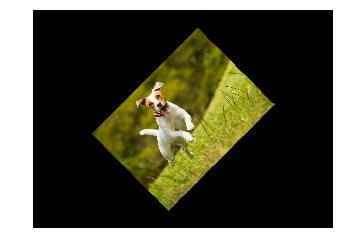

In [77]:
import cv2
import numpy as np

image = cv2.imread('Input/Image/dog.jpg')
height, width = image.shape[:2]

# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 45, .5)

rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

plt.imshow(BGR2RGB(rotated_image))
# plt.imshow(rotated_image)
plt.axis('off')
plt.show()

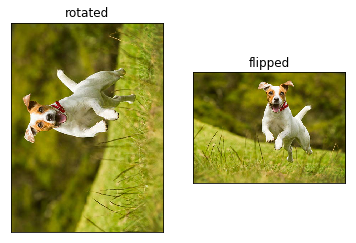

In [92]:
#Second method to rotate
img = cv2.imread('Input/Image/dog.jpg')
img = BGR2RGB(img)
rotated_image = cv2.transpose(img)
flipped = cv2.flip(img,1)
# rotateimg=pltimage(rotated_image)
# flipimg=pltimage(flipped)
imgs = [rotated_image,flipped]
titles=['rotated','flipped']

for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(imgs[i])
#     plt.subplot(1,2,i+1),pltimage(imgs[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


#### Scaling, re-sizing and interpolations

cv2.resize(image, dsize(output image size), x scale, y scale, interpolation)

In [5]:

image1 = cv2.imread('Input/Image/rot.jpg')
# image1 = BGR2RGB(image1)
# Let's make our image 3/4 of it's original size
Scaling_Linear_Interpolation = cv2.resize(image1, None, fx=0.75, fy=0.75)
# # Let's double the size of our image
Scaling_Cubic_Interpolation = cv2.resize(image1, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
# # Let's skew the re-sizing by setting exact dimensions
Scaling_Skewed_Size = cv2.resize(image1, (900, 400), interpolation = cv2.INTER_AREA)

cv2.imshow('Scaling_Linear_Interpolation',Scaling_Linear_Interpolation)
cv2.waitKey()

cv2.imshow('Scaling_Cubic_Interpolation',Scaling_Cubic_Interpolation)
cv2.waitKey()

cv2.imshow('Scaling_Skewed_Size',Scaling_Skewed_Size)
cv2.waitKey()
# titles = ["Scaling_Linear_Interpolation","Scaling_Cubic_Interpolation","Scaling_Skewed_Size"]
# images = [Scaling_Linear_Interpolation,Scaling_Cubic_Interpolation,Scaling_Skewed_Size]

# for i in range(3):
#     plt.subplot(2,2,i+1),plt.imshow(images[i])
#     plt.title(titles[i])
#     plt.xticks([]),plt.yticks([])
# plt.show()
cv2.destroyAllWindows()

## Cropping

In [6]:
import cv2
import numpy as np

image = cv2.imread('Input/Image/rot.jpg')
height, width = image.shape[:2]

# Let's get the starting pixel coordiantes (top  left of cropping rectangle)
start_row, start_col = int(height * .25), int(width * .25)

# Let's get the ending pixel coordinates (bottom right)
end_row, end_col = int(height * .75), int(width * .75)

# Simply use indexing to crop out the rectangle we desire
cropped = image[start_row:end_row , start_col:end_col]

cv2.imshow("Original Image", image)
cv2.waitKey(0) 
cv2.imshow("Cropped Image", cropped) 
cv2.waitKey(0) 
cv2.destroyAllWindows()